In [13]:
from PyPDF2 import PdfReader
import re
import nltk
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import random
from gensim import corpora, models
from nltk.sentiment import SentimentIntensityAnalyzer
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.cluster import KMeans
from gensim.models import Word2Vec
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.naive_bayes import MultinomialNB

#nltk.download('stopwords')

In [14]:
def read_pdf(file_path):
    with open(file_path, 'rb') as file:
        pdf_reader = PdfReader(file)
        num_pages = len(pdf_reader.pages)

        text = ''
        for page in pdf_reader.pages:
            text += page.extract_text()
        
        return text

In [17]:
book1_eng_path = 'books\english books\J.R.R. Tolkien - The Hobbit, or There and Back Again.pdf'
book2_eng_path = 'books\english books\J.R.R. Tolkien - The Lord of the Rings. The Fellowship Of The Ring.pdf'
book3_eng_path = 'books\english books\J.R.R. Tolkien - The Lord of the Rings. The Two Towers.pdf'
book4_eng_path = 'books\english books\J.R.R. Tolkien - The Lord of the Rings. The return of the King.pdf'

book1_eng = read_pdf(book1_eng_path)
book2_eng = read_pdf(book2_eng_path)
book3_eng = read_pdf(book3_eng_path)
book4_eng = read_pdf(book4_eng_path)

In [18]:
def cleaned_book(text):
    temp = re.sub("\s{2,}", " ", text)  # Usunięcie podwójnych spacji
    temp = re.sub("(\r\n|\r|\n)", " ", temp)  # Usunięcie przerw między słowami, entery
    temp = temp.lower()  # Zamiana wszystkich znaków na małe litery
    temp = re.sub("[!\"#$%&'()*+,-./:;<=>?@[\]^_`{|}~]", " ", temp)  # Usunięcie znaków specjalnych
    temp = re.sub("[^\w\s]", "", temp)  # Usunięcie znaków specjalnych
    temp = temp.strip()  # Usunięcie spacji lub odstępów na końcach tekstu

    # Usunięcie stop words w języku angielskim
    stopwords_set = set(stopwords.words('english'))

    # Tokenizacja tekstu za pomocą biblioteki NLTK
    cleaned_and_tokenized = word_tokenize(temp)

    # Usunięcie stop words
    cleaned_and_tokenized_without_stopwords = [word for word in cleaned_and_tokenized if word.lower() not in stopwords_set]

    return cleaned_and_tokenized_without_stopwords

In [19]:
book1_eng_cleaned = cleaned_book(book1_eng)
book2_eng_cleaned = cleaned_book(book2_eng)
book3_eng_cleaned = cleaned_book(book3_eng)
book4_eng_cleaned = cleaned_book(book4_eng)

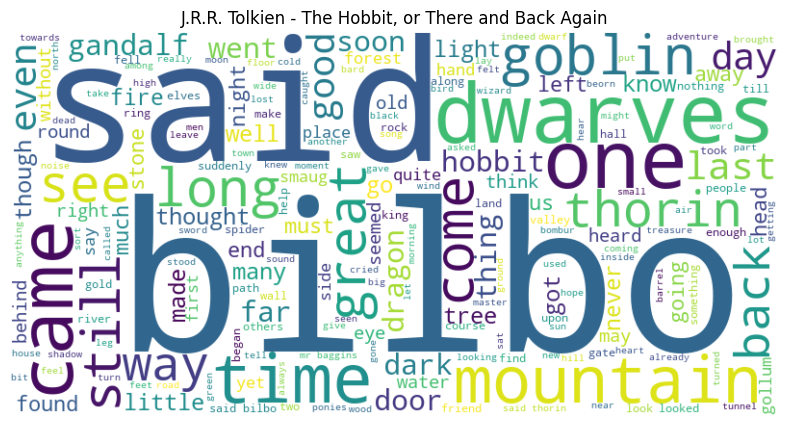

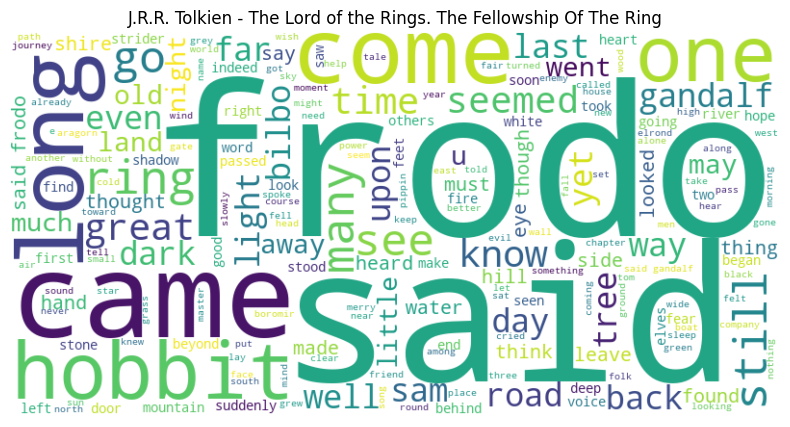

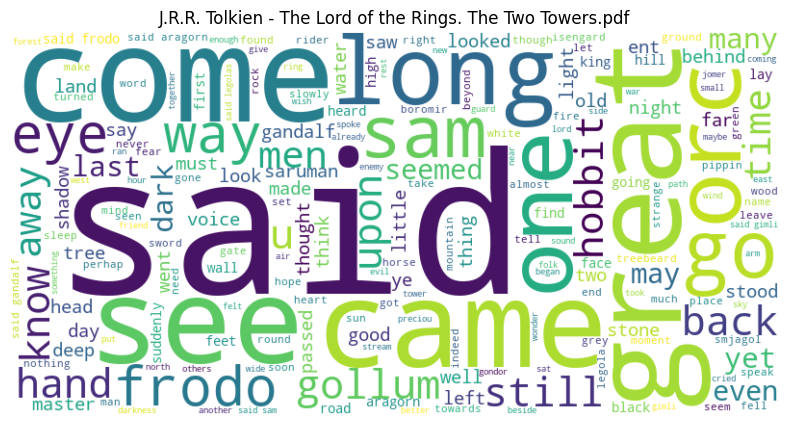

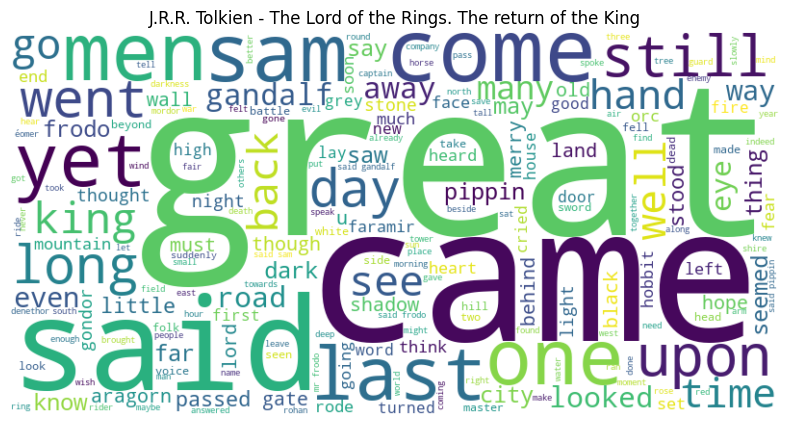

In [20]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Funkcja generująca chmurę słów i wyświetlająca ją na wykresie
def generate_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(text))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)  # Dodanie podpisu
    plt.show()

# Generowanie chmur słów dla oczyszczonych książek
generate_wordcloud(book1_eng_cleaned, "J.R.R. Tolkien - The Hobbit, or There and Back Again")
generate_wordcloud(book2_eng_cleaned, "J.R.R. Tolkien - The Lord of the Rings. The Fellowship Of The Ring")
generate_wordcloud(book3_eng_cleaned, "J.R.R. Tolkien - The Lord of the Rings. The Two Towers.pdf")
generate_wordcloud(book4_eng_cleaned, "J.R.R. Tolkien - The Lord of the Rings. The return of the King")
